<a href="https://colab.research.google.com/github/adarubin/ML-projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

## Introduction & Objective
This project focuses on developing a machine learning model to classify credit card transactions as either legitimate or fraudulent.  
The dataset used is the well-known **Credit Card Fraud Detection dataset** from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), which contains anonymized transaction data for European cardholders in September 2013.

### Why is this problem important?
- **Fraud detection** is a real-world challenge with high financial and security impact.
- The dataset is highly **imbalanced** (fraud cases are less than 0.2% of all transactions).
- Detecting fraud requires balancing **precision** (avoiding false alarms) and **recall** (catching as many frauds as possible).

### Project Goals
1. Perform **Exploratory Data Analysis (EDA)** to understand the data distribution, relationships, and challenges.  
2. Apply **data preprocessing** and deal with class imbalance.  
3. Build and evaluate different **classification models** (Logistic Regression,SVM, Random Forest, XGBoost).  
4. Assess performance using metrics such as **Precision, Recall, F1-score, and PR-AUC**.  
5. Summarize key insights and potential improvements.  

---


## Credit Card Fraud Detection - EDA
Exploring the Credit Card Fraud Detection dataset and performing initial data analysis.

**Notes on the dataset:**
- Most features (`V1`–`V28`) are the result of **PCA transformation** and have been **scaled**.
- The `Amount` and `Time` features have **not been scaled**.
- The dataset is highly **imbalanced**, with the number of fraud cases being much smaller than the number of non-fraud cases.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/creditcard.csv'
df = pd.read_csv(file_path)

print("\nDataset shape:", df.shape, "\n")
print(df.head())

Mounted at /content/drive

Dataset shape: (284807, 31) 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458

###First look at the data
Check the data types and basic statistics.

In [3]:
print("\nGeneral info:")
print(df.info())

print("\nBasic statistics:")
print(df.describe().T)


General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


###Missing values
Check for missing values in each column.

In [4]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


No missing values were found in the dataset.

###Imbalanced Dataset: Fraud vs. No Fraud

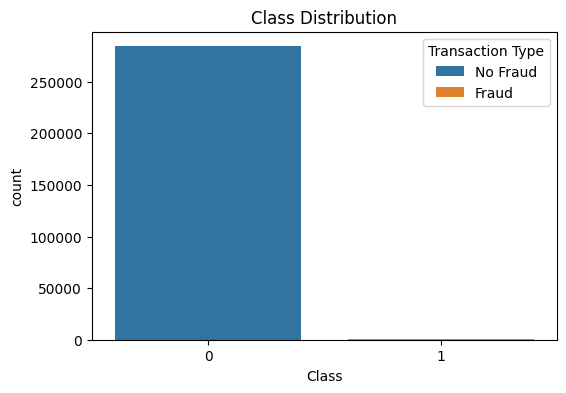

In [5]:
plt.figure(figsize=(6,4))
plt.title("Class Distribution")
sns.countplot(x="Class", data=df, hue='Class')
plt.legend(title='Transaction Type', labels=['No Fraud', 'Fraud'])
plt.show()


In [6]:
num_of_NoFraud = int(df[df["Class"]== 0]["Class"].count())
num_of_Fraud = int(df[df["Class"]== 1]["Class"].count())
sum_of_transactions = df["Class"].count()

print(f"Percentage of No Fraud transactions: {(num_of_NoFraud/sum_of_transactions)*100:.3f}% of the dataset\n")
print(f"Percentage of Fraud transactions: {(num_of_Fraud/sum_of_transactions)*100:.3f}% of the dataset\n")

Percentage of No Fraud transactions: 99.827% of the dataset

Percentage of Fraud transactions: 0.173% of the dataset



###Features distribution
We will examine how the features are distributed.

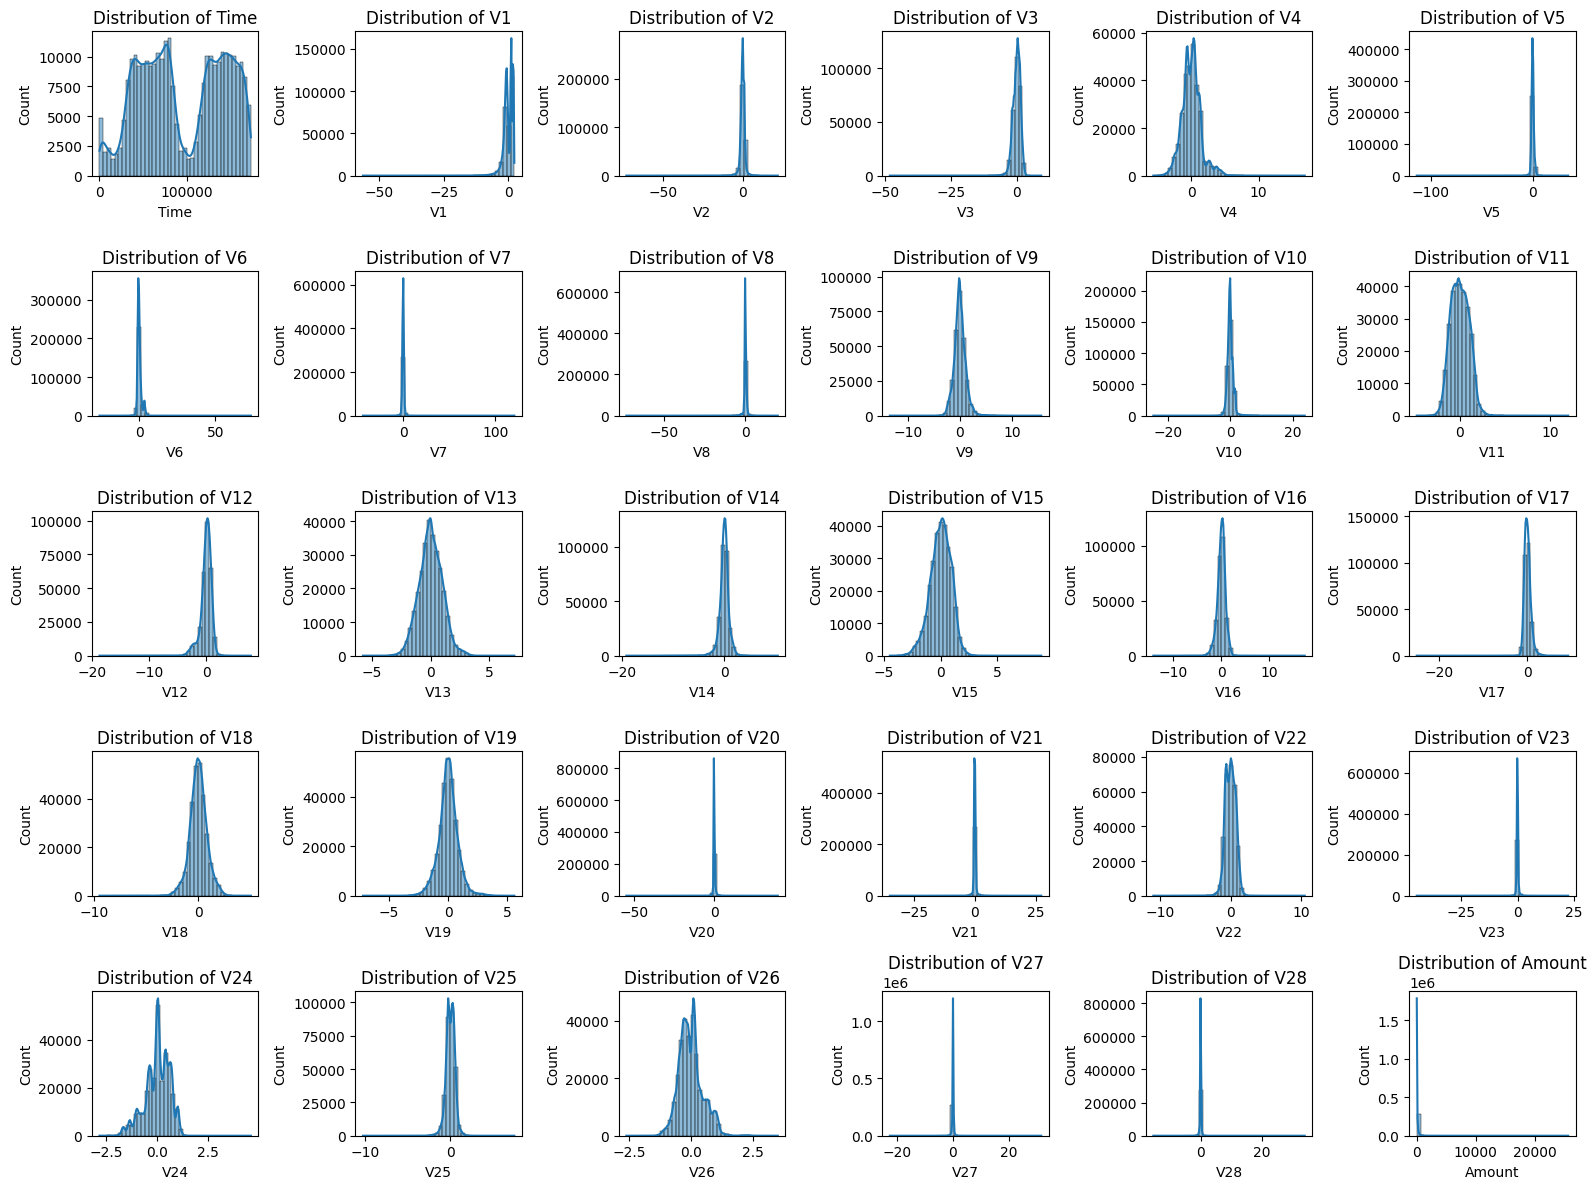

In [7]:
num_cols = df.columns.drop("Class")

plt.figure(figsize=(16,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 6, i)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

###Outliers Detection
Boxplots are used to identify extreme values in the dataset.
Points outside the whiskers may indicate potential outliers that could affect model performance.

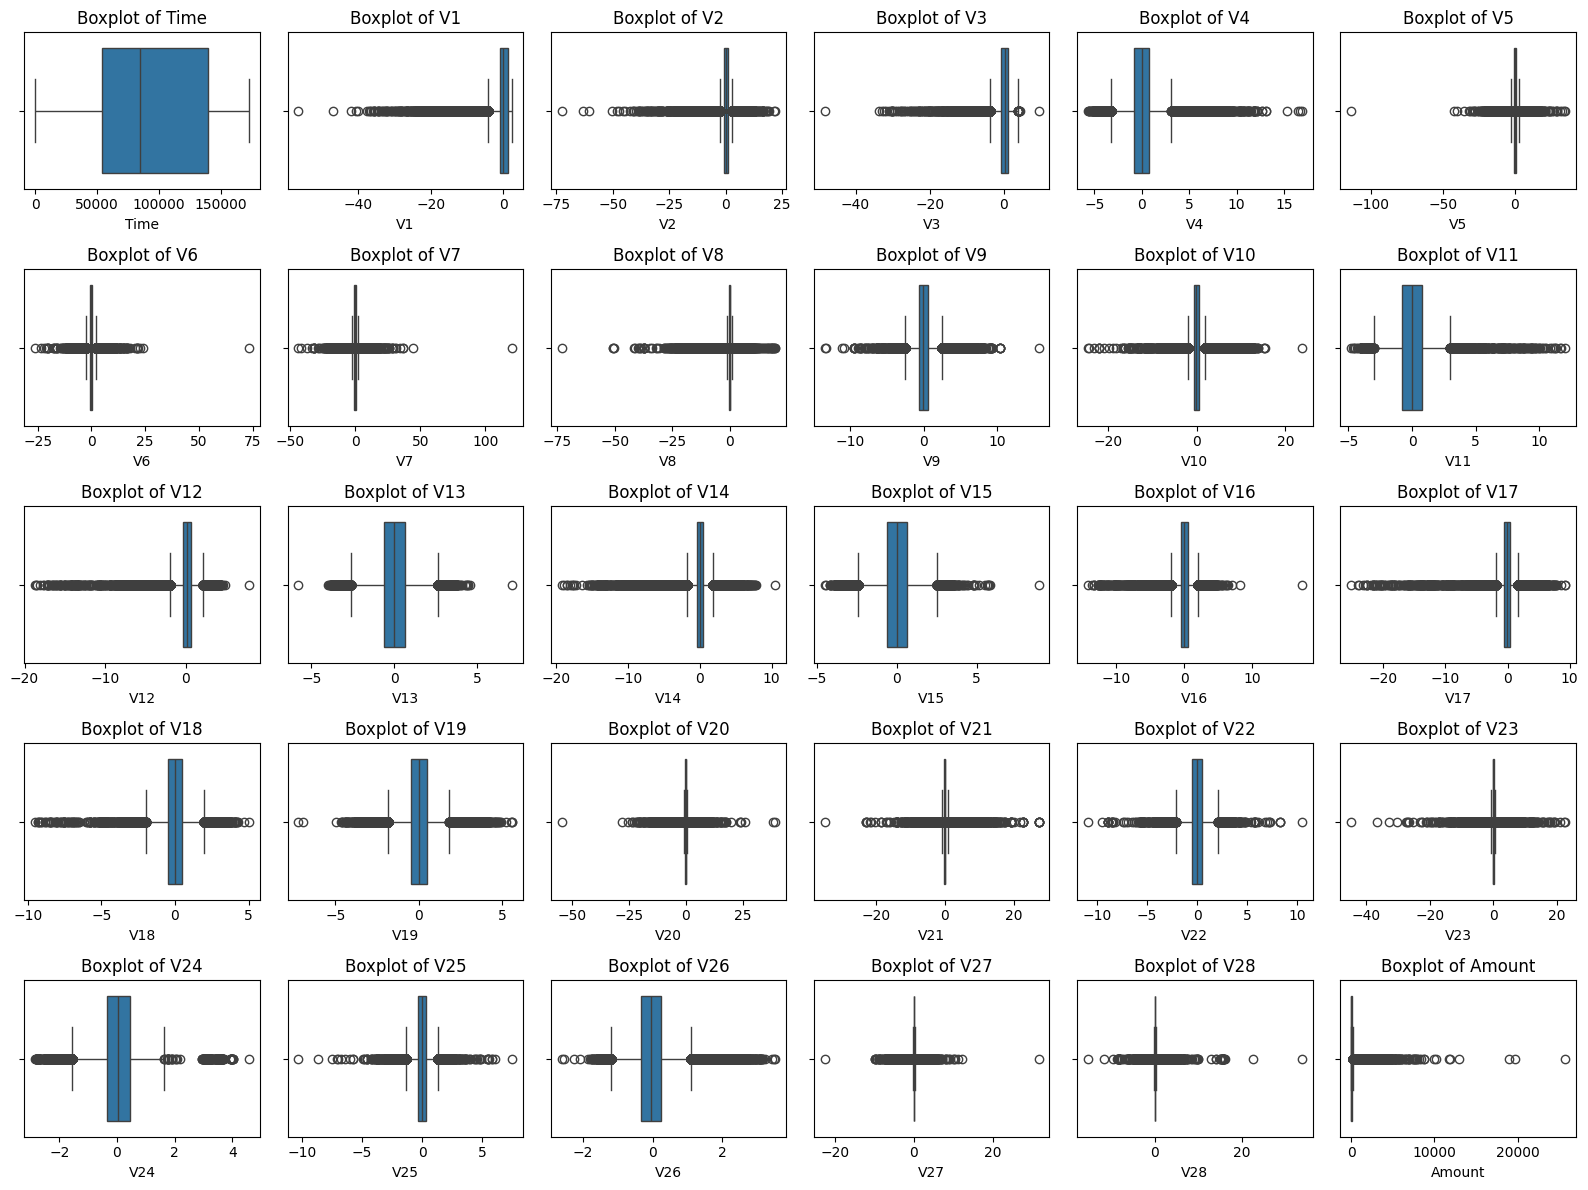

In [8]:
plt.figure(figsize=(16,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

##Correlation with target
Scatterplots are used to visualize the relationship between each feature and the target variable.
They help identify linear or non-linear patterns, as well as noisy or weak correlations.

Class     1.000000
V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V11       0.154876
V4        0.133447
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V2        0.091289
V6       -0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time     -0.012323
V28       0.009536
V24      -0.007221
Amount    0.005632
V13      -0.004570
V26       0.004455
V15      -0.004223
V25       0.003308
V23      -0.002685
V22       0.000805
Name: Class, dtype: float64


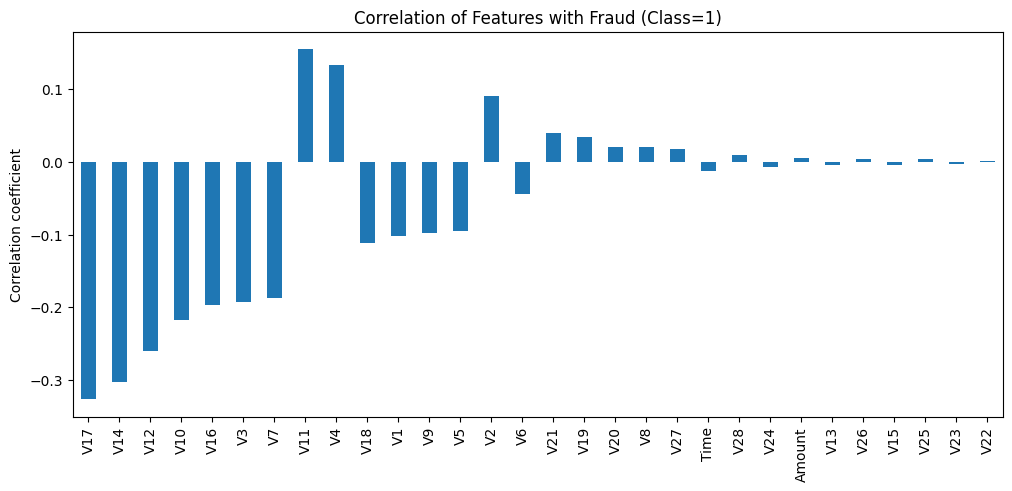

In [9]:
correlations = df.corr(numeric_only=True)["Class"].sort_values(key=abs, ascending=False)

print(correlations)

correlations.drop("Class").plot(kind="bar", figsize=(12,5))
plt.title("Correlation of Features with Fraud (Class=1)")
plt.ylabel("Correlation coefficient")
plt.show()

###Time Feature Analysis

We will examine the Time feature to see if it provides relevant information for detecting fraud.
We convert the transaction time (in seconds) to the hour of the day and compute the fraud rate per hour.

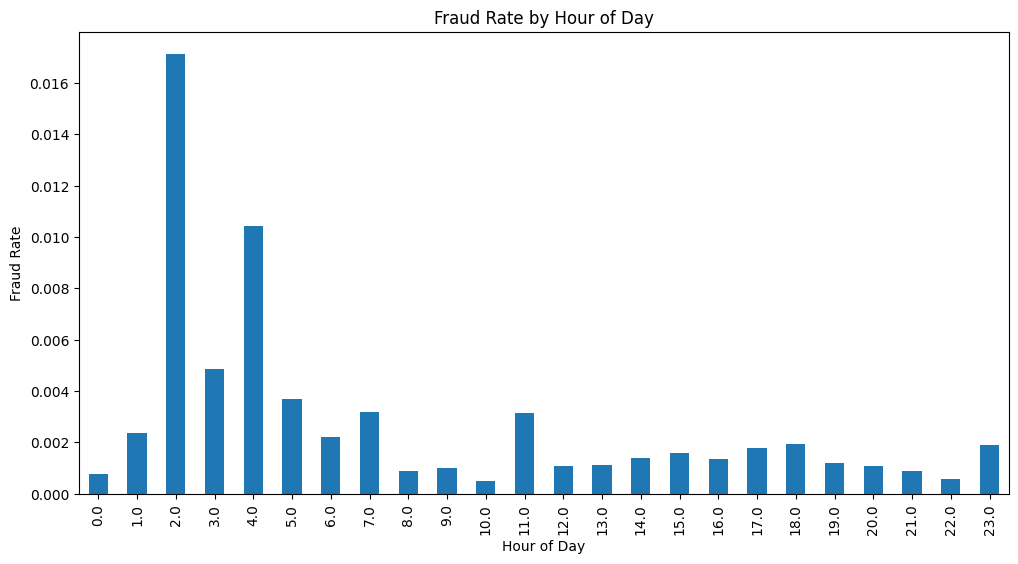

In [10]:
df['Hour'] = (df['Time'] // 3600) % 24
hourly = df.groupby('Hour')['Class'].mean()
hourly.plot(kind='bar', figsize=(12,6))
plt.ylabel('Fraud Rate')
plt.xlabel('Hour of Day')
plt.title('Fraud Rate by Hour of Day')
plt.show()



We analyzed the Time feature by converting it to the hour of the day and calculating the fraud rate per hour.

Observations from the plot:

The fraud rate is significantly higher during the early morning hours (around 2–4 AM).

During the rest of the day, the fraud rate is relatively low and stable.

Conclusions:

The Time feature (or more precisely, the Hour of Day) does carry predictive information for fraud detection.

It is worth keeping this feature in the model.

For better representation, we can apply feature engineering:

Use Hour as is.

Use a cyclical encoding (sin, cos) to preserve the cyclical relationship between hours.

# Credit Card Fraud Detection - Exploratory Data Analysis (EDA) Summary

## 1. Introduction & Objective
- **Objective:** Build a machine learning model to classify credit card transactions as either legitimate or fraudulent.  
- **Dataset:** Credit Card Fraud Detection (Kaggle), anonymized transactions from European cardholders, September 2013.  
- **Problem Characteristics:** Highly imbalanced dataset (<0.2% fraud).  
- **Project Goals:** Perform EDA, preprocess data, handle class imbalance, build & evaluate models (Logistic Regression, SVM, Random Forest, XGBoost), and assess performance with Precision, Recall, F1-score, and PR-AUC.

## 2. Data Overview
- **Shape:** 284,807 rows × 31 columns.  
- **Features:**
  - `V1–V28`: PCA transformed features, already scaled.
  - `Amount` & `Time`: not scaled.
  - `Class`: target variable (0 = No Fraud, 1 = Fraud).
- **Missing Values:** None detected.

## 3. Class Imbalance
- No Fraud: 99.827%
- Fraud: 0.173%
- Visualization with `countplot` shows extreme imbalance.

## 4. Feature Distribution
- Histograms indicate that most PCA features are centered around 0.  
- `Amount` is heavily skewed → log-transform recommended before modeling.  
- `Time` converted to `Hour` shows that fraud rate is higher during early morning hours (2–4 AM), then stabilizes during the rest of the day.  
  - **Decision:** `Hour` provides useful information, so we will keep it through **feature engineering**:
    - Create **cyclical features** using `sin` and `cos` to capture the cyclical nature of hours.
    - Drop original `Time` and `Hour` columns after generating sin/cos features.

## 5. Outliers
- Boxplots show the presence of outliers, particularly in `Amount`.  
- Outliers in `Amount` may carry valuable information for fraud detection.  
- Instead of removing them, we may later consider creating an indicator feature for extreme values.

## 6. Correlation with Target (Class)
- Pearson correlation was computed for numeric features.  
- Features most correlated with `Class` (Fraud): `V17` (-0.33), `V14` (-0.30), `V12` (-0.26), `V10` (-0.22), `V16` (-0.20), `V3` (-0.19).  
- `Amount` and `Time` show very low correlation with `Class` (0.0056 and -0.012, respectively).  
- **Next Step:** For linear models like Logistic Regression or linear SVM, we may perform **feature selection** based on correlation to reduce noise and improve model performance.

---

### Key Insights from EDA
1. Dataset is highly imbalanced; special techniques (class_weight, SMOTE, undersampling) will be required.  
2. PCA features are already scaled, but `Amount` should be log-transformed and scaled before modeling.  
3. Original `Time`/`Hour` will be dropped, keeping **cyclical sin/cos features** to capture hourly fraud patterns.  
4. Outliers in `Amount` could be informative and may be captured via additional features.  
5. Strongest linear correlations with `Class` will guide feature selection for linear models.


## Preprocessing
In this section, we prepare the Credit Card Fraud Detection dataset for machine learning.

- Drop the original `Time` and `Hour` columns because they are not directly informative.  
- Perform **feature engineering** on `Hour` to create cyclical features (`Hour_sin`, `Hour_cos`) that capture the hourly fraud patterns.  
- Handle skewness in the `Amount` feature with **log-transform**.  
- Split the dataset into training and testing sets.  
- Standardize numerical features where needed (especially `Amount` and engineered cyclical features).  


### Feature Engineering - Hour Feature
Create **cyclical features** from the `Hour` feature to capture the daily pattern of fraud:
- `Hour_sin` = sin(2 * π * Hour / 24)
- `Hour_cos` = cos(2 * π * Hour / 24)  

These features preserve the cyclical relationship between hours while removing the original `Hour` column.


In [11]:
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

### Drop `Time` and `Hour` Features
- The original `Time` and `Hour` columns will be dropped because they are not directly informative for fraud detection.  
- We retain only the engineered cyclical features (`Hour_sin`, `Hour_cos`) to capture the hourly fraud patterns.


In [12]:
df.drop(["Time", "Hour"], axis=1, inplace=True)

### Log-transform `Amount` Feature
- The `Amount` feature is heavily skewed, which can negatively affect model performance.  
- Applying a log transformation reduces skewness and stabilizes variance, making it more suitable for machine learning models.


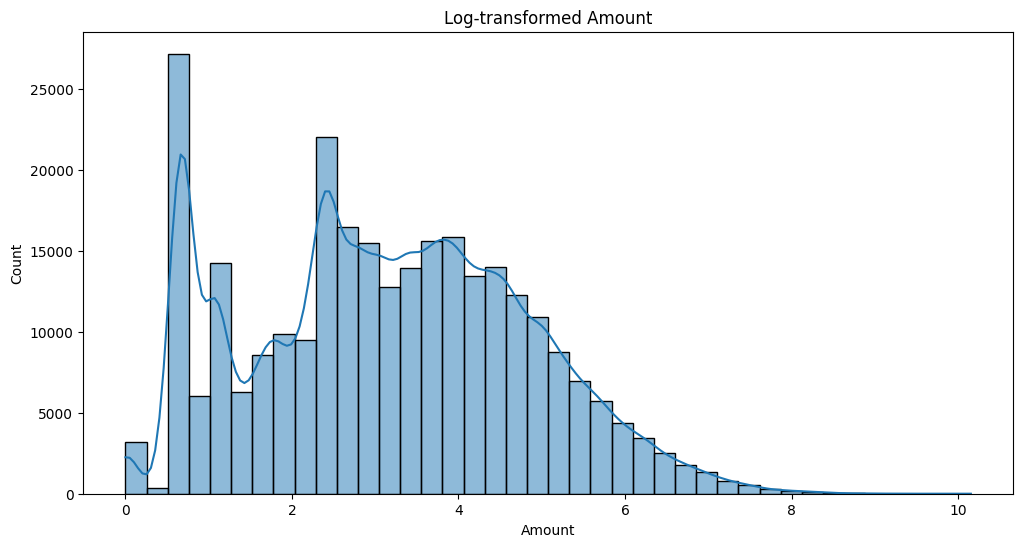

In [13]:
df['Amount'] = df['Amount'].apply(lambda x: np.log1p(x))

plt.figure(figsize=(12,6))
sns.histplot(df['Amount'], kde=True, bins=40)
plt.title("Log-transformed Amount")
plt.show()


The log-transformation reduces the strong right skew of the `Amount` feature.  
Although the distribution is not perfectly uniform after transformation, it is significantly improved compared to the original.  
This step makes the feature more suitable for subsequent standardization.

###Train/Test Split
Split the dataset into training and test sets (80/20 split).
Random state is fixed for reproducibility.

In [14]:

from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### Feature Standardization
- Standardization is applied to features that are not yet scaled to ensure comparable ranges for ML models.  
- `V1–V28`: Already scaled via PCA → no need for standardization.  
- `Amount`: After log-transform, will be standardized.  
- `Hour_sin` and `Hour_cos`: Already in [-1, 1] → no need to standardize.


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train['Amount_scaled'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount_scaled'] = scaler.transform(X_test[['Amount']])

X_train = X_train.drop(['Amount'], axis=1)
X_test = X_test.drop(['Amount'], axis=1)

## Modeling

### 1. Objective
In this section, we build machine learning models to classify credit card transactions as legitimate or fraudulent.  
We will start with linear models as baselines, extend them with feature selection and hyperparameter tuning, and, if needed, move on to tree-based methods.  

### 2. Modeling Plan
- **Step 1: Baseline Models**  
  Train Logistic Regression and **LinearSVC** (instead of kernel SVM, since the dataset is large) with `class_weight="balanced"` to address class imbalance.  

- **Step 2: Feature Selection**  
  Re-train models using only features with the strongest correlation to the target.  

- **Step 3: Hyperparameter Tuning (Randomized/Grid Search)**  
  Perform hyperparameter tuning with `RandomizedSearchCV` or `GridSearchCV` to compare:  
  - Different regularization strengths (Logistic Regression, LinearSVC).  

- **Step 4: Feature Importance Analysis**  
  For Logistic Regression and LinearSVC, analyze coefficients to understand feature importance (analogous to feature importance in tree-based models).  

- **Step 5: Class Imbalance Techniques (if needed)**  
  If models underperform, apply resampling techniques: **SMOTE, undersampling, oversampling**.  

- **Step 6: Tree-Based Models**  
  Train Random Forest and XGBoost as more powerful, non-linear models.  
  - Evaluate feature importance.  
  - Fine-tune with `RandomizedSearchCV`.  

### 3. Evaluation Metrics
Since fraud detection is highly imbalanced, accuracy is not informative.  
We will evaluate models using:  
- **Precision** – proportion of predicted frauds that are correct.  
- **Recall (Sensitivity)** – proportion of actual frauds correctly identified (**critical metric for this problem**).  
- **F1-score** – harmonic mean of Precision and Recall.  
- **ROC-AUC / PR-AUC** – overall measure of model discrimination ability.  
  - **PR-AUC** will be our main metric for comparing models, since it better reflects performance on the minority (fraud) class.  

### 4. Threshold Selection
After choosing the best model (based on PR-AUC), we will tune the classification threshold.  
The business goal is to **detect as many frauds as possible (high Recall)**, while keeping false alarms within reasonable limits to avoid frustrating customers.  
Threshold selection will be guided by the trade-off between **Recall, Precision, and F1-score**.  


###**Baseline Models: Logistic Regression & LinearSVC**

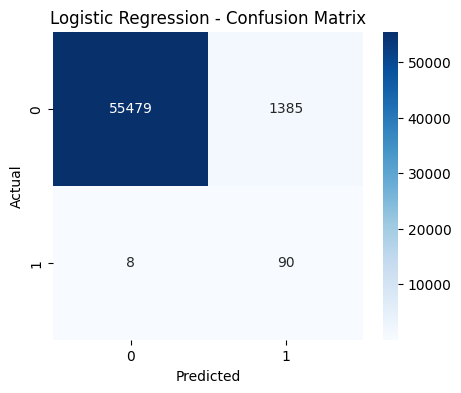

=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962

ROC-AUC: 0.9803
PR-AUC: 0.7471


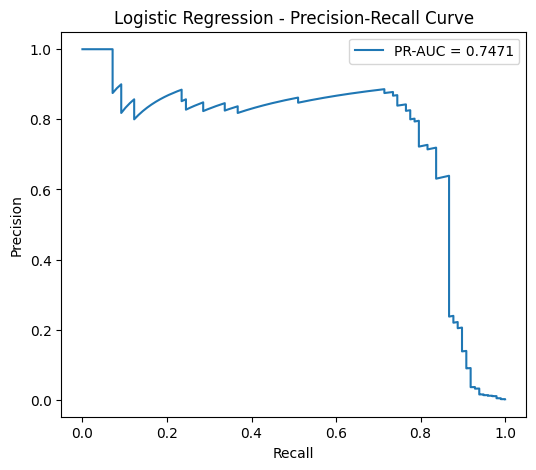

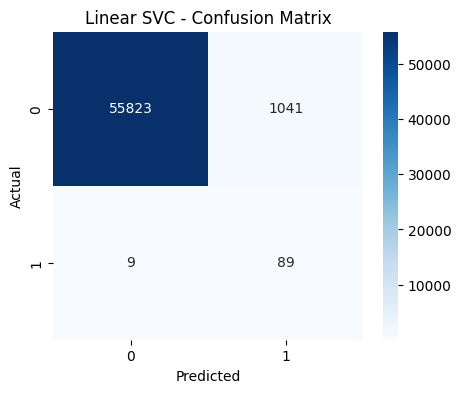

=== Linear SVC ===
              precision    recall  f1-score   support

           0     0.9998    0.9817    0.9907     56864
           1     0.0788    0.9082    0.1450        98

    accuracy                         0.9816     56962
   macro avg     0.5393    0.9449    0.5678     56962
weighted avg     0.9983    0.9816    0.9892     56962

ROC-AUC: 0.9825
PR-AUC: 0.7349


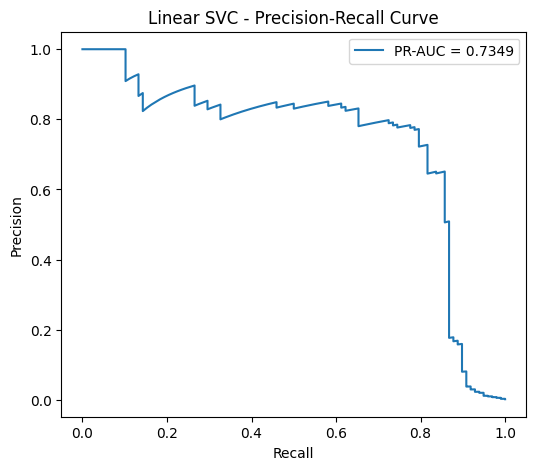

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, precision_recall_curve, auc
)

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_scores = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:,1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(f"=== {model_name} ===")
    print(classification_report(y_test, y_pred, digits=4))

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_scores)
    print(f"ROC-AUC: {roc_auc:.4f}")

    # PR-AUC
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)
    print(f"PR-AUC: {pr_auc:.4f}")

    # Plot Precision-Recall Curve
    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, label=f'PR-AUC = {pr_auc:.4f}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.legend()
    plt.show()

# Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, solver="liblinear", random_state=42)
evaluate_model(log_reg, X_train, y_train, X_test, y_test, "Logistic Regression")

# Linear SVC
svc = LinearSVC(class_weight="balanced", max_iter=1000, random_state=42)
evaluate_model(svc, X_train, y_train, X_test, y_test, "Linear SVC")


**Logistic Regression:**

Very high specificity (class 0 recall ≈ 0.976), low precision on fraud (class 1) but high recall (0.918).

ROC-AUC: 0.9803 → excellent discrimination overall.

PR-AUC: 0.7471 → good performance given class imbalance.

**Linear SVC:**

Slightly higher specificity (class 0 recall ≈ 0.982) and slightly better F1 for fraud (0.145 vs 0.114).

ROC-AUC: 0.9825 → marginally better than Logistic Regression.

PR-AUC: 0.7349 → comparable, slightly lower than Logistic Regression.

**Takeaways:**

Both linear models are effective at capturing fraud despite extreme class imbalance.

Recall for fraud is high, which aligns with business interest (catching as many frauds as possible).

PR-AUC is a more informative metric than accuracy due to imbalance.

Next step: apply feature selection, hyperparameter tuning, and potentially move to tree-based models if performance needs improvement.

###**Feature Selection**

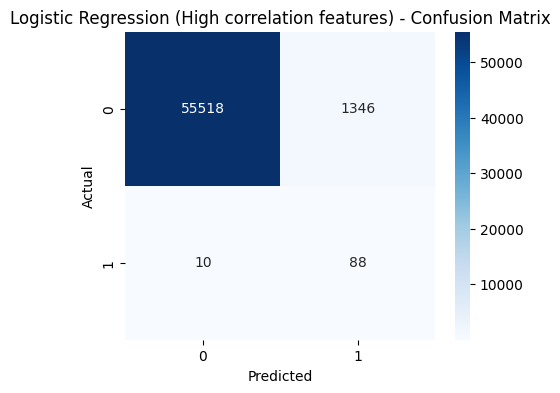

=== Logistic Regression (High correlation features) ===
              precision    recall  f1-score   support

           0     0.9998    0.9763    0.9879     56864
           1     0.0614    0.8980    0.1149        98

    accuracy                         0.9762     56962
   macro avg     0.5306    0.9371    0.5514     56962
weighted avg     0.9982    0.9762    0.9864     56962

ROC-AUC: 0.9814
PR-AUC: 0.7322


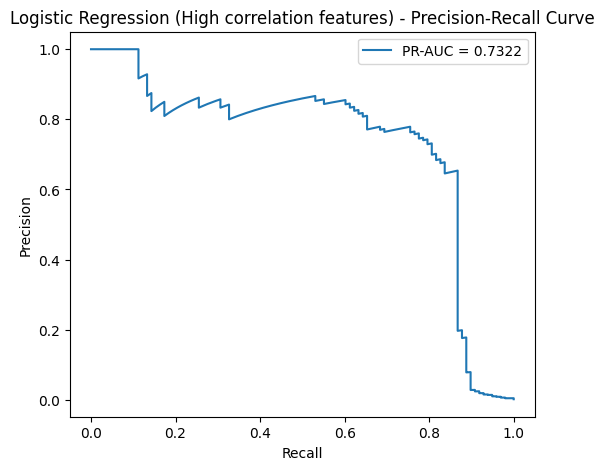

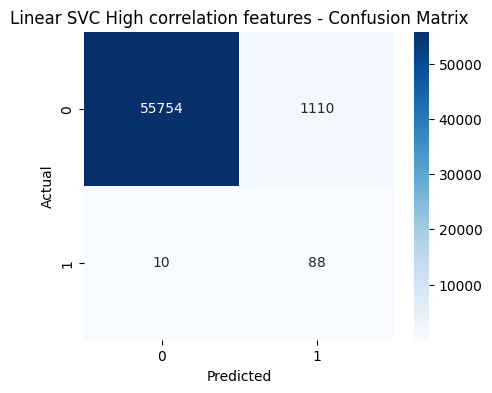

=== Linear SVC High correlation features ===
              precision    recall  f1-score   support

           0     0.9998    0.9805    0.9901     56864
           1     0.0735    0.8980    0.1358        98

    accuracy                         0.9803     56962
   macro avg     0.5366    0.9392    0.5629     56962
weighted avg     0.9982    0.9803    0.9886     56962

ROC-AUC: 0.9807
PR-AUC: 0.7123


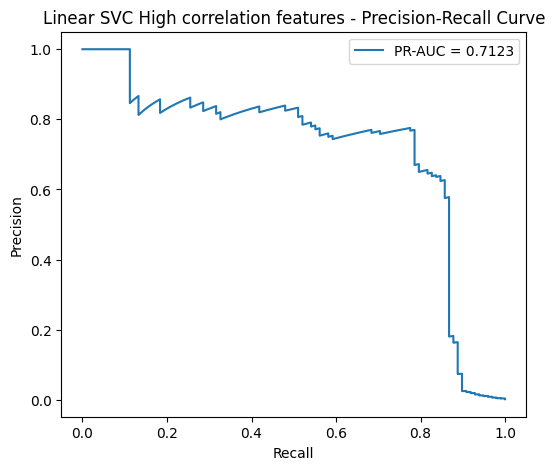

In [17]:
features_to_drop = ["V8", "V27", "V28", "V24", "Amount_scaled", "V13", "V26", "V15", "V25", "V23", "V22"]
X_train_highCorr = X_train.drop(features_to_drop, axis=1)
X_test_highCorr = X_test.drop(features_to_drop, axis=1)

# Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, solver="liblinear", random_state=42)
evaluate_model(log_reg, X_train_highCorr, y_train, X_test_highCorr, y_test, "Logistic Regression (High correlation features)")

# Linear SVC
svc = LinearSVC(class_weight="balanced", max_iter=1000, random_state=42)
evaluate_model(svc, X_train_highCorr, y_train, X_test_highCorr, y_test, "Linear SVC High correlation features")

After removing a large set of low-correlation features, both Logistic Regression and Linear SVC showed ***slightly worse performance*** compared to the baseline (lower PR-AUC).  
This suggests that dropping too many features may have removed useful information.  
Next, we will try a more conservative feature selection (removing fewer features) to check if performance improves relative to the baseline.


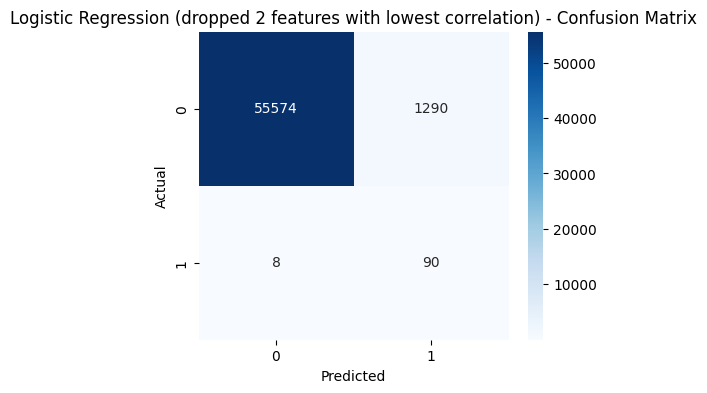

=== Logistic Regression (dropped 2 features with lowest correlation) ===
              precision    recall  f1-score   support

           0     0.9999    0.9773    0.9885     56864
           1     0.0652    0.9184    0.1218        98

    accuracy                         0.9772     56962
   macro avg     0.5325    0.9478    0.5551     56962
weighted avg     0.9982    0.9772    0.9870     56962

ROC-AUC: 0.9819
PR-AUC: 0.7465


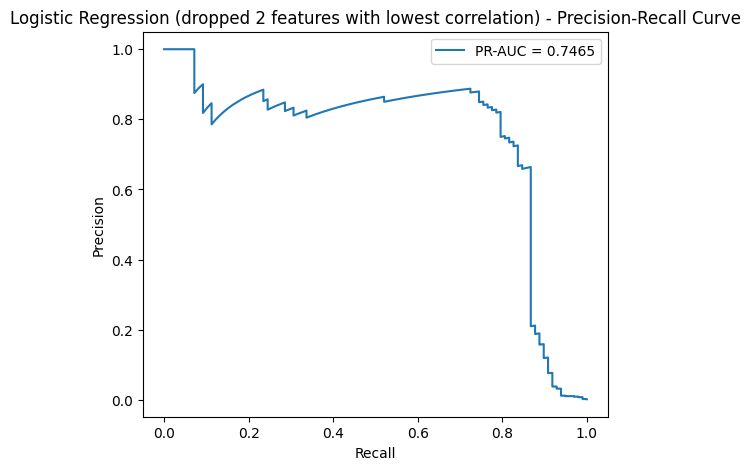

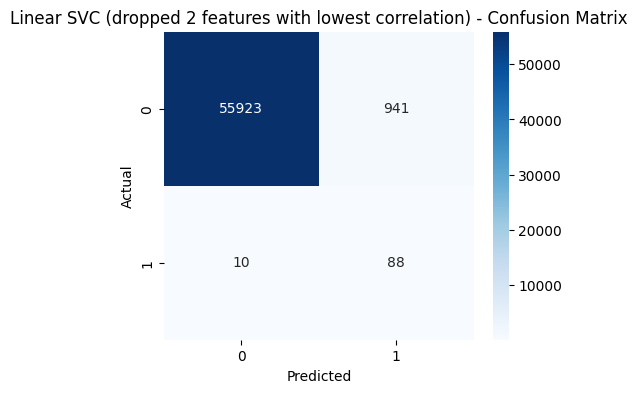

=== Linear SVC (dropped 2 features with lowest correlation) ===
              precision    recall  f1-score   support

           0     0.9998    0.9835    0.9916     56864
           1     0.0855    0.8980    0.1562        98

    accuracy                         0.9833     56962
   macro avg     0.5427    0.9407    0.5739     56962
weighted avg     0.9982    0.9833    0.9901     56962

ROC-AUC: 0.9841
PR-AUC: 0.7371


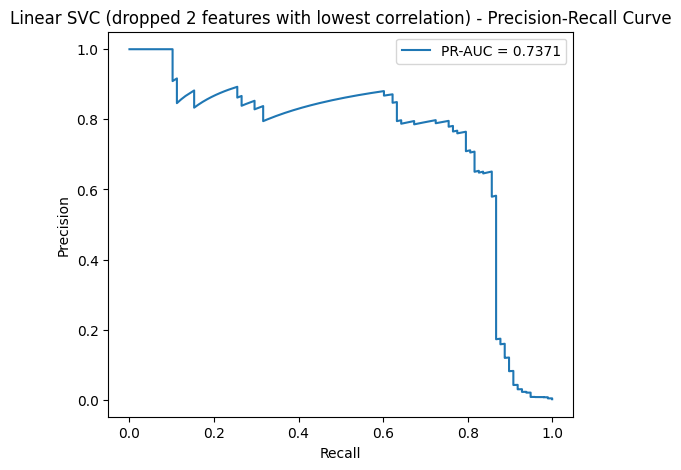

In [18]:
features_to_drop = ["V23", "V22"]
X_train_highCorr = X_train.drop(features_to_drop, axis=1)
X_test_highCorr = X_test.drop(features_to_drop, axis=1)

# Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, solver="liblinear", random_state=42)
evaluate_model(log_reg, X_train_highCorr, y_train, X_test_highCorr, y_test, "Logistic Regression (dropped 2 features with lowest correlation)")

# Linear SVC
svc = LinearSVC(class_weight="balanced", max_iter=1000, random_state=42)
evaluate_model(svc, X_train_highCorr, y_train, X_test_highCorr, y_test, "Linear SVC (dropped 2 features with lowest correlation)")

After dropping only the two features with the lowest correlation (V23, V22), both Logistic Regression and Linear SVC achieved a ***slight improvement*** compared to the baseline (higher ROC-AUC and PR-AUC).  
This suggests that removing a very small set of uninformative features can help reduce noise and improve performance, unlike removing too many features which degraded the results.


### **Hyperparameter Tuning: Logistic Regression & LinearSVC**

We perform a two-step tuning process:

- **RandomizedSearchCV** over a wide range of hyperparameters to explore the search space.  
- **GridSearchCV** over a narrower range around the best candidates from step 1 for fine-tuning.  

The validation metric used for model selection is **Average Precision (PR-AUC)**, since this task is highly imbalanced and PR-AUC better reflects performance on the minority (fraud) class.  
After tuning, we report the final results also in terms of PR-AUC, alongside other metrics (precision, recall, F1, ROC-AUC).



####**RandomizedSearchCV**

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import average_precision_score

# Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, solver="liblinear", random_state=42)
param_dist_lr = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2']
}

random_search_lr = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist_lr,
    n_iter=20,
    scoring="average_precision",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search_lr.fit(X_train_highCorr, y_train)
print("Best Logistic Regression Params (Random Search):", random_search_lr.best_params_)

# Linear SVC
svc = LinearSVC(class_weight="balanced", max_iter=1000, random_state=42, dual=False)
param_dist_svc = {
    'C': np.logspace(-4, 4, 20)
}

random_search_svc = RandomizedSearchCV(
    svc,
    param_distributions=param_dist_svc,
    n_iter=20,
    scoring="average_precision",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search_svc.fit(X_train_highCorr, y_train)
print("Best Linear SVC Params (Random Search):", random_search_svc.best_params_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Logistic Regression Params (Random Search): {'penalty': 'l1', 'C': np.float64(0.03359818286283781)}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Linear SVC Params (Random Search): {'C': np.float64(4.281332398719396)}


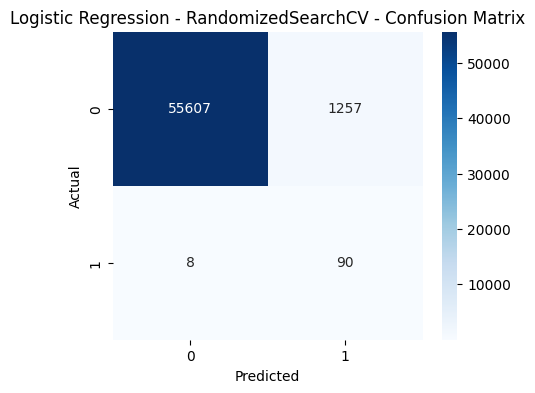

=== Logistic Regression - RandomizedSearchCV ===
              precision    recall  f1-score   support

           0     0.9999    0.9779    0.9888     56864
           1     0.0668    0.9184    0.1246        98

    accuracy                         0.9778     56962
   macro avg     0.5333    0.9481    0.5567     56962
weighted avg     0.9983    0.9778    0.9873     56962

ROC-AUC: 0.9826
PR-AUC: 0.7482


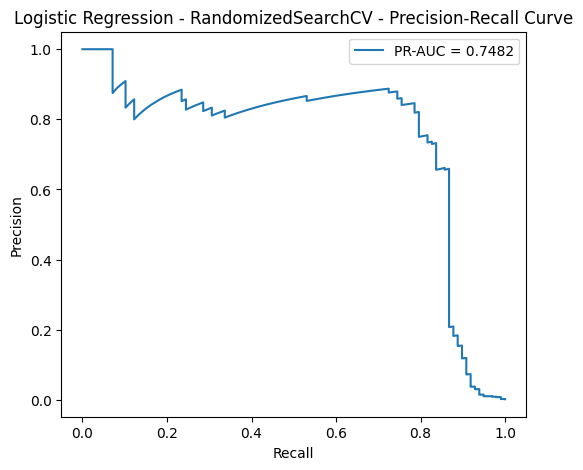

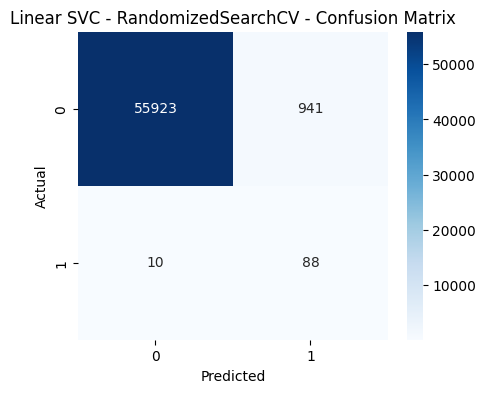

=== Linear SVC - RandomizedSearchCV ===
              precision    recall  f1-score   support

           0     0.9998    0.9835    0.9916     56864
           1     0.0855    0.8980    0.1562        98

    accuracy                         0.9833     56962
   macro avg     0.5427    0.9407    0.5739     56962
weighted avg     0.9982    0.9833    0.9901     56962

ROC-AUC: 0.9841
PR-AUC: 0.7371


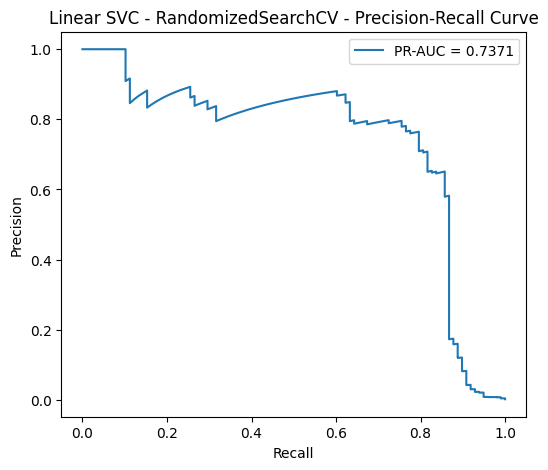

In [20]:
# Logistic Regression
best_lr = random_search_lr.best_estimator_
evaluate_model(best_lr, X_train_highCorr, y_train, X_test_highCorr, y_test, "Logistic Regression - RandomizedSearchCV")

# Linear SVC
best_svc = random_search_svc.best_estimator_
evaluate_model(best_svc, X_train_highCorr, y_train, X_test_highCorr, y_test, "Linear SVC - RandomizedSearchCV")

####**GridSearchCV**

In [21]:
from sklearn.model_selection import GridSearchCV

# --- Logistic Regression ---
log_reg = LogisticRegression(
    class_weight="balanced", max_iter=1000, solver="liblinear",
    random_state=42, penalty='l1')

# Narrow range around the best C
best_C_lr = 0.03359818286283781
param_grid_lr = {
    'C': np.logspace(np.log10(best_C_lr/5), np.log10(best_C_lr*5), 10)
    }

grid_search_lr = GridSearchCV(
    log_reg, param_grid=param_grid_lr,
    scoring='f1', cv=3, verbose=1, n_jobs=-1
)
grid_search_lr.fit(X_train_highCorr, y_train)
print("Best Logistic Regression Params (Grid Search):", grid_search_lr.best_params_)

# --- Linear SVC ---
svc = LinearSVC(class_weight="balanced", max_iter=1000, random_state=42)

# Narrow range around best C
best_C_svc = 4.281332398719396
param_grid_svc = {
    'C': np.logspace(np.log10(best_C_svc/5), np.log10(best_C_svc*5), 10)
}

grid_search_svc = GridSearchCV(
    svc, param_grid=param_grid_svc,
    scoring='f1', cv=3, verbose=1, n_jobs=-1
)
grid_search_svc.fit(X_train_highCorr, y_train)
print("Best Linear SVC Params (Grid Search):", grid_search_svc.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Logistic Regression Params (Grid Search): {'C': np.float64(0.006719636572567563)}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Linear SVC Params (Grid Search): {'C': np.float64(0.8562664797438793)}


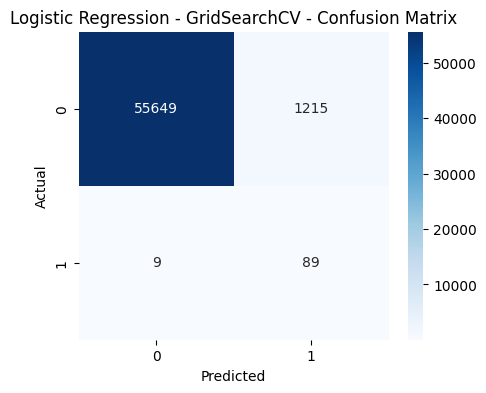

=== Logistic Regression - GridSearchCV ===
              precision    recall  f1-score   support

           0     0.9998    0.9786    0.9891     56864
           1     0.0683    0.9082    0.1270        98

    accuracy                         0.9785     56962
   macro avg     0.5340    0.9434    0.5580     56962
weighted avg     0.9982    0.9785    0.9876     56962

ROC-AUC: 0.9841
PR-AUC: 0.7527


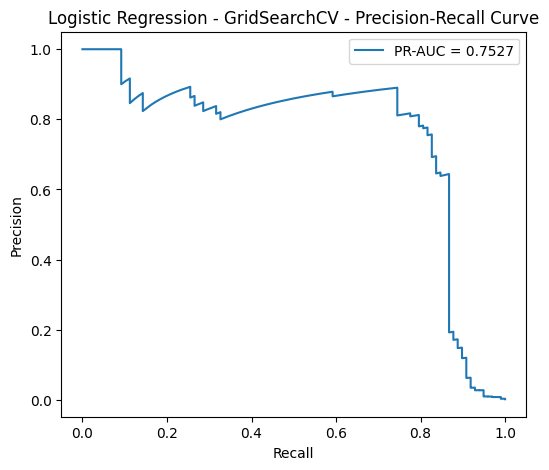

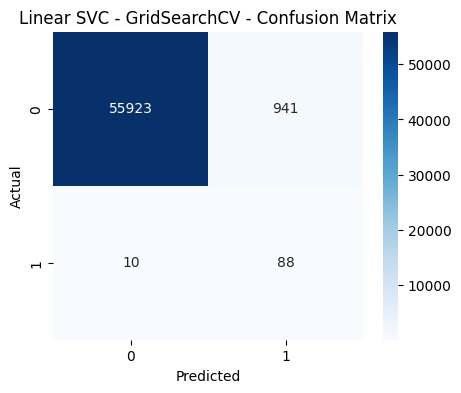

=== Linear SVC - GridSearchCV ===
              precision    recall  f1-score   support

           0     0.9998    0.9835    0.9916     56864
           1     0.0855    0.8980    0.1562        98

    accuracy                         0.9833     56962
   macro avg     0.5427    0.9407    0.5739     56962
weighted avg     0.9982    0.9833    0.9901     56962

ROC-AUC: 0.9841
PR-AUC: 0.7371


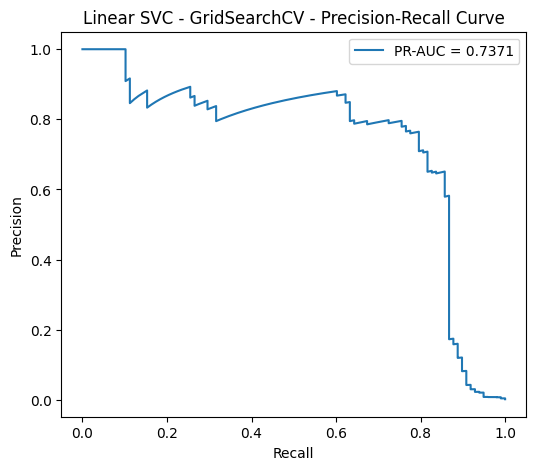

In [22]:
# Logistic Regression
best_lr = grid_search_lr.best_estimator_
evaluate_model(best_lr, X_train_highCorr, y_train, X_test_highCorr, y_test, "Logistic Regression - GridSearchCV")

# Linear SVC
best_svc = grid_search_svc.best_estimator_
evaluate_model(best_svc, X_train_highCorr, y_train, X_test_highCorr, y_test, "Linear SVC - GridSearchCV")

#### **Hyperparameter Tuning Results Summary**

**RandomizedSearchCV (wide search):**  
- **Logistic Regression:**  
  - Best params: `penalty='l1', C≈0.0336`  
  - PR-AUC: 0.7482 → slight improvement over baseline  
  - Recall for fraud (class 1) ≈ 0.918 → small gain  

- **Linear SVC:**  
  - Best params: `C≈4.28`  
  - PR-AUC: 0.7371 → no significant change  
  - Recall for fraud (class 1) ≈ 0.898 → stable  

**GridSearchCV (fine tuning around best Randomized params):**  
- **Logistic Regression:**  
  - Best params: `C≈0.0067`  
  - PR-AUC: 0.7527 → slight additional improvement  
  - Recall for fraud ≈ 0.908 → stable  
- **Linear SVC:**  
  - Best params: `C≈0.856`  
  - PR-AUC: 0.7371 → still no improvement  
  - Recall for fraud ≈ 0.898 → unchanged  

**Takeaways:**  
- Hyperparameter tuning gives small improvements for Logistic Regression, especially in PR-AUC.  
- Linear SVC already performs stably with `class_weight='balanced'`, so tuning had minimal effect.  
- PR-AUC and recall remain the key metrics due to the extreme class imbalance.






### **Feature Importance Analysis**

We analyze the learned coefficients of Logistic Regression and LinearSVC from the best models selected by GridSearchCV to understand which features contribute most to predicting fraud.  
Higher absolute coefficient values indicate greater importance, similar to feature importance in tree-based models.  

In this step, we compare the absolute values of the coefficients for each feature and retrain the models on subsets of top features (e.g., top 15, 20, 25) to evaluate if using only the most important features improves performance.  
This approach helps interpret the linear models, reduce dimensionality, and guide future feature selection.


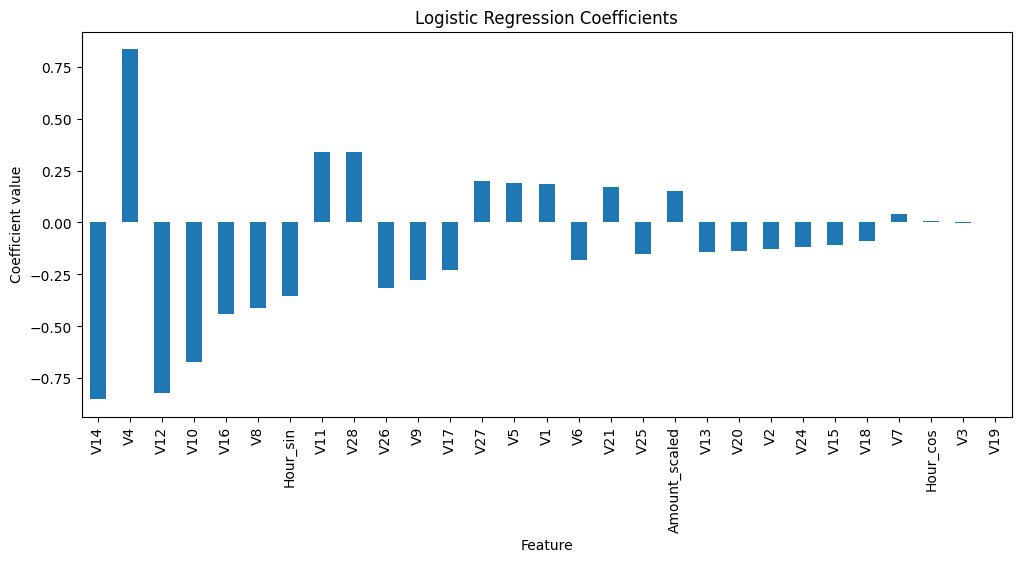

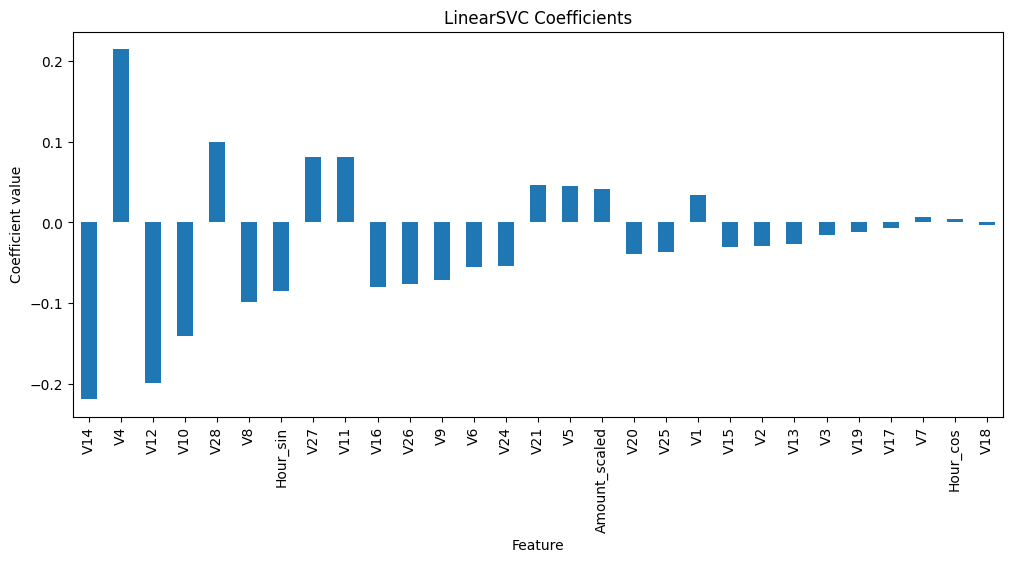

In [23]:
coef_lr = pd.DataFrame({
    'Feature': X_test_highCorr.columns,
    'Logistic Regression Coefficient': best_lr.coef_[0],
})


coef_lr.sort_values( by= 'Logistic Regression Coefficient', key= np.abs , ascending=False, inplace=True)

coef_lr.set_index("Feature")["Logistic Regression Coefficient"].plot(
    kind="bar", figsize=(12,5)
)

plt.title("Logistic Regression Coefficients")
plt.ylabel("Coefficient value")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()

coef_svc = pd.DataFrame({
    'Feature': X_test_highCorr.columns,
    'LinearSVC Coefficient': best_svc.coef_[0],
})


coef_svc.sort_values( by= 'LinearSVC Coefficient', key= np.abs , ascending=False, inplace=True)

coef_svc.set_index("Feature")["LinearSVC Coefficient"].plot(
    kind="bar", figsize=(12,5)
)

plt.title("LinearSVC Coefficients")
plt.ylabel("Coefficient value")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()

top_15_lr = coef_lr.iloc[:15]['Feature'].tolist()
X_train_lr_15 = X_train_highCorr[top_15_lr]
X_train_lr_15 = X_test_highCorr[top_15_lr]

top_15_svc = coef_svc.iloc[:15]['Feature'].tolist()
X_train_SVC_15 = X_train_highCorr[top_15_svc]
X_test_SVC_15 = X_test_highCorr[top_15_svc]

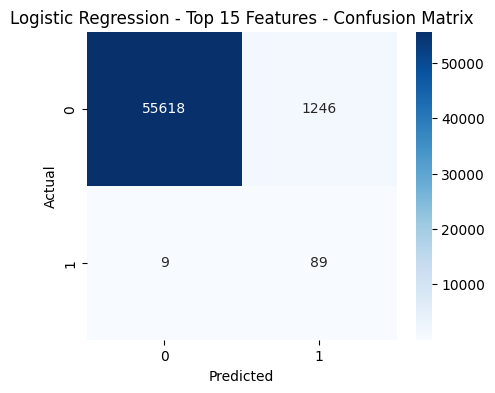

=== Logistic Regression - Top 15 Features ===
              precision    recall  f1-score   support

           0     0.9998    0.9781    0.9888     56864
           1     0.0667    0.9082    0.1242        98

    accuracy                         0.9780     56962
   macro avg     0.5333    0.9431    0.5565     56962
weighted avg     0.9982    0.9780    0.9874     56962

ROC-AUC: 0.9811
PR-AUC: 0.7548


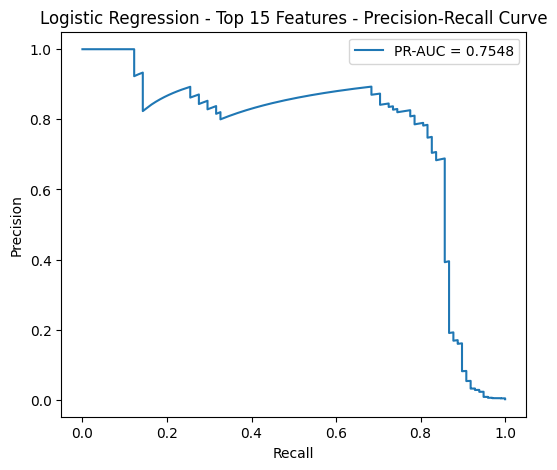

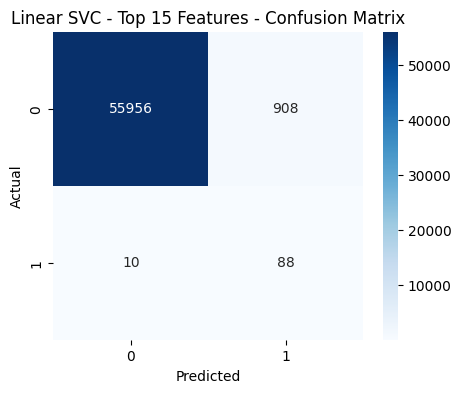

=== Linear SVC - Top 15 Features ===
              precision    recall  f1-score   support

           0     0.9998    0.9840    0.9919     56864
           1     0.0884    0.8980    0.1609        98

    accuracy                         0.9839     56962
   macro avg     0.5441    0.9410    0.5764     56962
weighted avg     0.9983    0.9839    0.9904     56962

ROC-AUC: 0.9832
PR-AUC: 0.7486


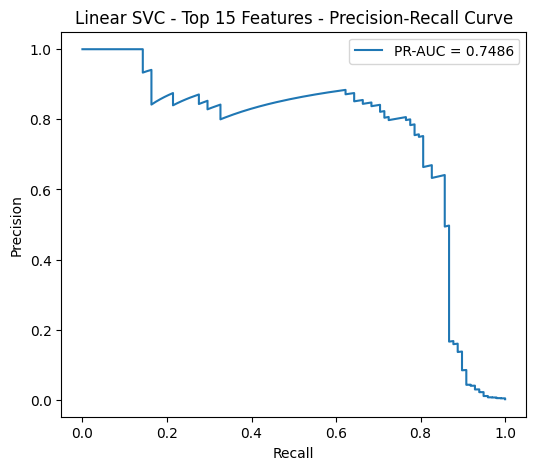

In [24]:
top_15_lr = coef_lr.iloc[:15]['Feature'].tolist()
X_train_lr_15 = X_train_highCorr[top_15_lr]
X_test_lr_15 = X_test_highCorr[top_15_lr]

top_15_svc = coef_svc.iloc[:15]['Feature'].tolist()
X_train_SVC_15 = X_train_highCorr[top_15_svc]
X_test_SVC_15 = X_test_highCorr[top_15_svc]

lr_15 = grid_search_lr.best_estimator_
evaluate_model(lr_15, X_train_lr_15, y_train, X_test_lr_15, y_test, "Logistic Regression - Top 15 Features")

SVC_15 = grid_search_svc.best_estimator_
evaluate_model(SVC_15, X_train_SVC_15, y_train, X_test_SVC_15, y_test, "Linear SVC - Top 15 Features")

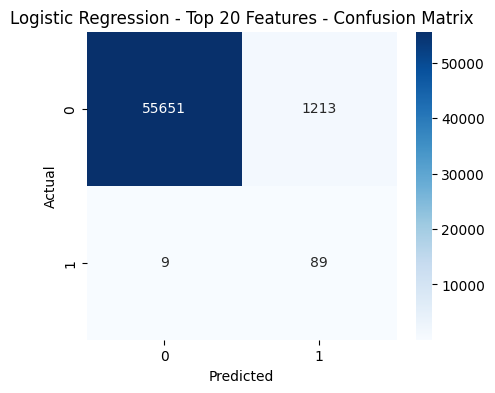

=== Logistic Regression - Top 20 Features ===
              precision    recall  f1-score   support

           0     0.9998    0.9787    0.9891     56864
           1     0.0684    0.9082    0.1271        98

    accuracy                         0.9785     56962
   macro avg     0.5341    0.9434    0.5581     56962
weighted avg     0.9982    0.9785    0.9877     56962

ROC-AUC: 0.9848
PR-AUC: 0.7558


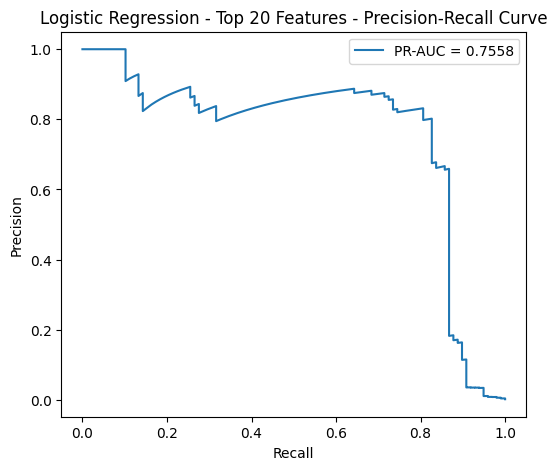

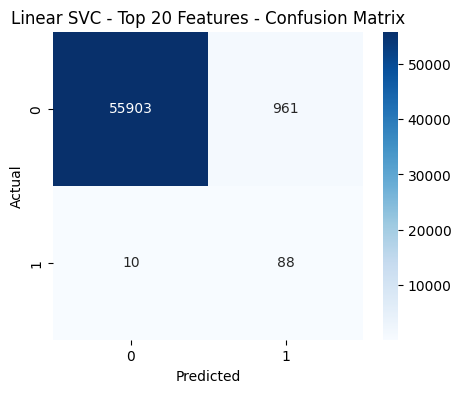

=== Linear SVC - Top 20 Features ===
              precision    recall  f1-score   support

           0     0.9998    0.9831    0.9914     56864
           1     0.0839    0.8980    0.1534        98

    accuracy                         0.9830     56962
   macro avg     0.5419    0.9405    0.5724     56962
weighted avg     0.9982    0.9830    0.9899     56962

ROC-AUC: 0.9822
PR-AUC: 0.7388


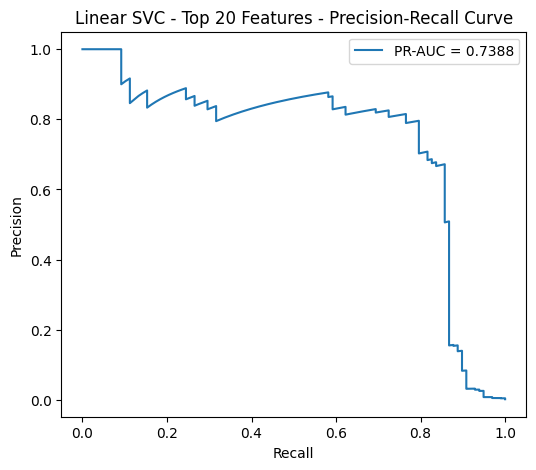

In [25]:
top_20_lr = coef_lr.iloc[:20]['Feature'].tolist()
X_train_lr_20 = X_train_highCorr[top_20_lr]
X_test_lr_20 = X_test_highCorr[top_20_lr]

top_20_svc = coef_svc.iloc[:20]['Feature'].tolist()
X_train_SVC_20 = X_train_highCorr[top_20_svc]
X_test_SVC_20 = X_test_highCorr[top_20_svc]

lr_20 = grid_search_lr.best_estimator_
evaluate_model(lr_20, X_train_lr_20, y_train, X_test_lr_20, y_test, "Logistic Regression - Top 20 Features")

SVC_20 = grid_search_svc.best_estimator_
evaluate_model(SVC_20, X_train_SVC_20, y_train, X_test_SVC_20, y_test, "Linear SVC - Top 20 Features")

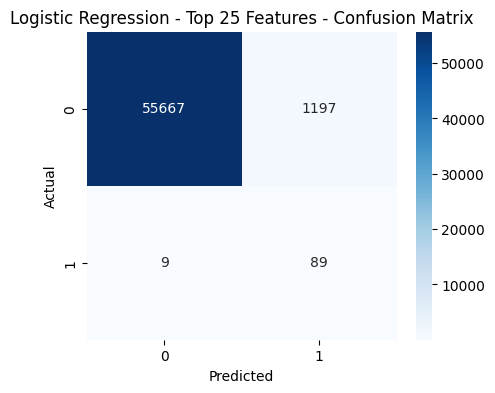

=== Logistic Regression - Top 25 Features ===
              precision    recall  f1-score   support

           0     0.9998    0.9789    0.9893     56864
           1     0.0692    0.9082    0.1286        98

    accuracy                         0.9788     56962
   macro avg     0.5345    0.9436    0.5589     56962
weighted avg     0.9982    0.9788    0.9878     56962

ROC-AUC: 0.9833
PR-AUC: 0.7545


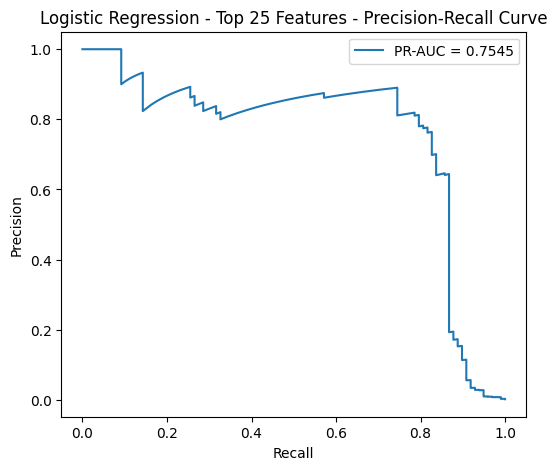

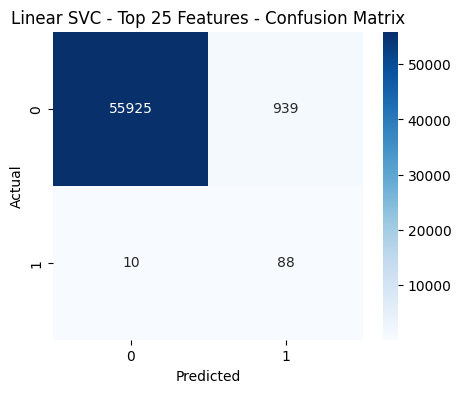

=== Linear SVC - Top 25 Features ===
              precision    recall  f1-score   support

           0     0.9998    0.9835    0.9916     56864
           1     0.0857    0.8980    0.1564        98

    accuracy                         0.9833     56962
   macro avg     0.5428    0.9407    0.5740     56962
weighted avg     0.9982    0.9833    0.9901     56962

ROC-AUC: 0.9836
PR-AUC: 0.7385


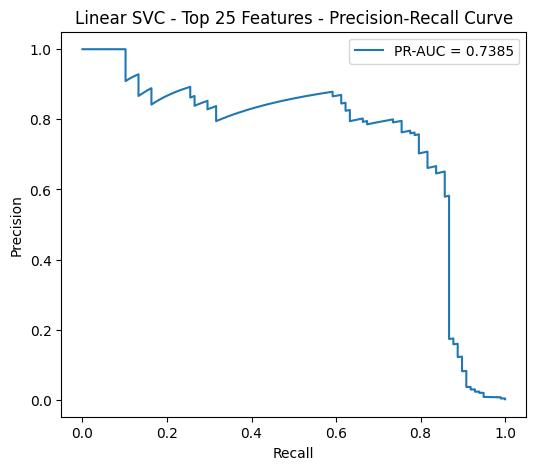

In [26]:
top_25_lr = coef_lr.iloc[:25]['Feature'].tolist()
X_train_lr_25 = X_train_highCorr[top_25_lr]
X_test_lr_25 = X_test_highCorr[top_25_lr]

top_25_svc = coef_svc.iloc[:25]['Feature'].tolist()
X_train_SVC_25 = X_train_highCorr[top_25_svc]
X_test_SVC_25 = X_test_highCorr[top_25_svc]

lr_25 = grid_search_lr.best_estimator_
evaluate_model(lr_25, X_train_lr_25, y_train, X_test_lr_25, y_test, "Logistic Regression - Top 25 Features")

SVC_25 = grid_search_svc.best_estimator_
evaluate_model(SVC_25, X_train_SVC_25, y_train, X_test_SVC_25, y_test, "Linear SVC - Top 25 Features")

We analyzed feature importance by examining the absolute values of the coefficients from the best Logistic Regression and LinearSVC models (selected via GridSearchCV). We then retrained the models using only the top features to see if performance improves.

**Logistic Regression (Best PR-AUC = 0.7558)**  
- Top 15 features: PR-AUC = 0.7548  
- Top 20 features: PR-AUC = 0.7558 ✅ **Best**  
- Top 25 features: PR-AUC = 0.7545  
- Conclusion: Using the top 20 features gives a slight improvement over the full model (PR-AUC = 0.7527), indicating that these features capture most of the signal for detecting fraud.

**LinearSVC (Best PR-AUC = 0.7371)**  
- Top 15 features: PR-AUC = 0.7486 ✅ **Best**  
- Top 20 features: PR-AUC = 0.7388  
- Top 25 features: PR-AUC = 0.7385  
- Conclusion: Using the top 15 features actually improves PR-AUC slightly over the full model, suggesting that removing less important features reduces noise and helps the linear model focus on the most predictive features.

**Summary:**  
Focusing on the top features based on absolute coefficient values can slightly improve model performance. For Logistic Regression, the top 20 features are optimal, while for LinearSVC, the top 15 features yield the best PR-AUC.

###XGB

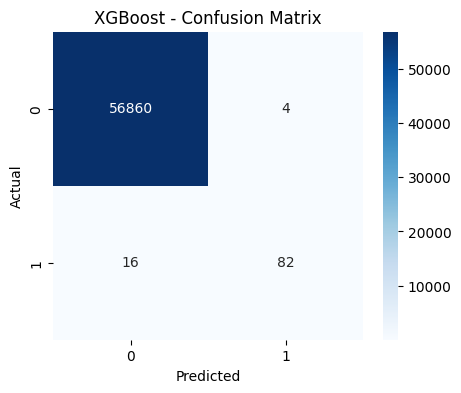

=== XGBoost ===
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9535    0.8367    0.8913        98

    accuracy                         0.9996     56962
   macro avg     0.9766    0.9183    0.9456     56962
weighted avg     0.9996    0.9996    0.9996     56962

ROC-AUC: 0.9800
PR-AUC: 0.8954


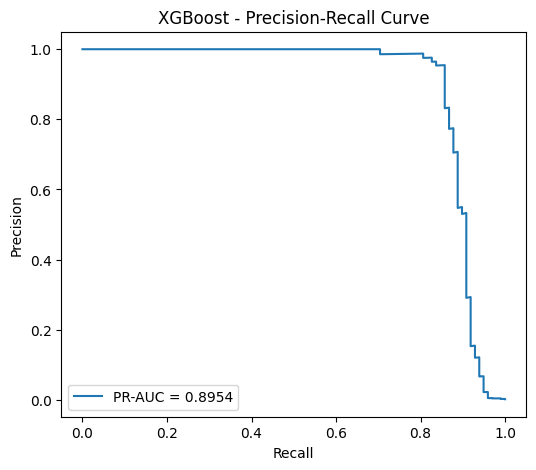

In [27]:
from xgboost import XGBClassifier

neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale = neg / pos

# XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, eval_metric='logloss', scale_pos_weight=scale)
evaluate_model(xgb, X_train, y_train, X_test, y_test, "XGBoost")